In [1]:
!pip install yfinance

Question 1: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf

In [3]:
# Create a ticker object
tsla = yf.Ticker('TSLA')

In [4]:
# Extract stock information and save it in a dataframe named tesla_data
tsla_data = tsla.history(period="max")

In [5]:
# Reset the index
tsla_data.reset_index(inplace=True)

In [6]:
# Display the first five rows of the tesla_data dataframe
print(tsla_data.head())

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


Question 2: Use Webscraping to Extract Tesla Revenue Data

In [7]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [8]:
# Download the webpage
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url).text


In [9]:
# Parse the html data
soup = BeautifulSoup(html_data, "html.parser")

In [10]:
#find a html table in the web page
table = soup.find('table') # in html table is represented by the tag <table>
tsla_revenue = pd.read_html(str(table))[0]

In [11]:
# Rename columns
tsla_revenue.columns = ["Date", "Revenue"]

In [31]:
# Remove comma and dollar sign from Revenue column
tsla_revenue["Revenue"] = tsla_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [13]:
# Remove null or empty strings in the Revenue column
tsla_revenue.dropna(inplace=True)
tsla_revenue = tsla_revenue[tsla_revenue['Revenue'] != ""]


In [14]:
# Display the last 5 rows of the tesla_revenue dataframe
print(tsla_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Question 3: Use yfinance to Extract Stock Data

In [15]:
# Create a ticker object
gme = yf.Ticker('GME')

In [16]:
# Extract stock information and save it in a dataframe named gme_data
gme_data = gme.history(period="max")

In [17]:
# Reset the index
gme_data.reset_index(inplace=True)

In [18]:
# Display the first five rows of the gme_data dataframe
print(gme_data.head())

                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691667  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578048  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


Question 4: Use Webscraping to Extract GME Revenue Data

In [19]:
# Download the webpage
gme_url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
gme_html_data = requests.get(gme_url).text

In [20]:
# Parse the html data
gme_soup = BeautifulSoup(gme_html_data, "html.parser")

In [21]:
# Extract the table with GameStop Revenue and store it into a dataframe named gme_revenue
gme_table = gme_soup.find("table")
gme_revenue = pd.read_html(str(table))[0]

In [22]:
# Rename columns
gme_revenue.columns = ["Date", "Revenue"]


In [30]:
# Remove comma and dollar sign from Revenue column
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"", regex=True)

In [24]:
# Remove null or empty strings in the Revenue column
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

In [25]:
# Display the last 5 rows of the gme_revenue dataframe
print(gme_revenue.tail())

    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


Question 5: Plot Tesla Stock Graph

In [26]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    
    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

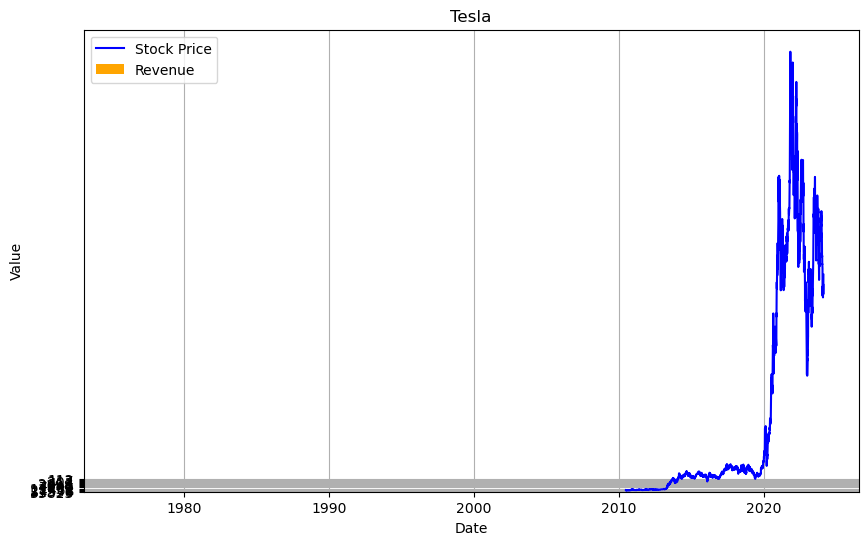

In [27]:
# Plot Tesla Stock Graph
make_graph(tsla_data, tsla_revenue, 'Tesla')

Question 6: Plot GameStop Stock Graph

In [28]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))
    
    # Plotting stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    
    # Plotting revenue data
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

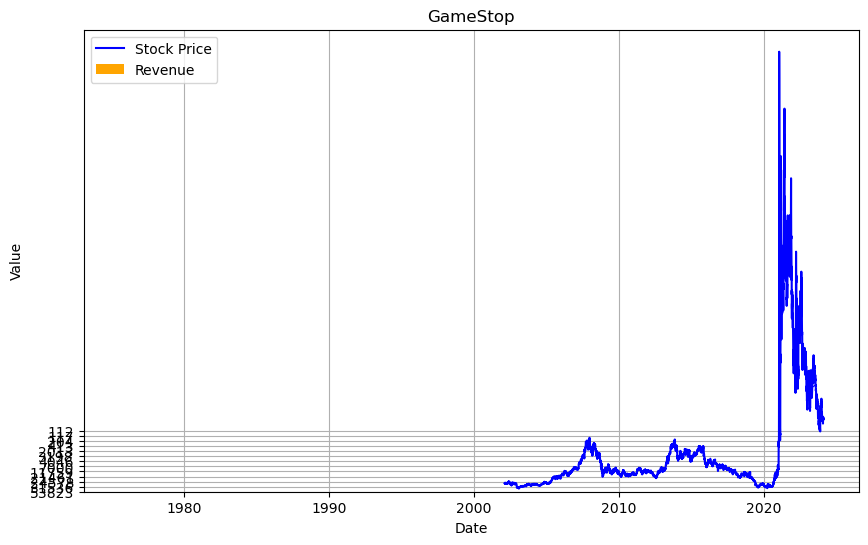

In [29]:
# Plot GameStop Stock Graph
make_graph(gme_data, gme_revenue, 'GameStop')